<a href="https://colab.research.google.com/github/yoboiwatsup/MachineLearning/blob/main/Week%203/Classification_Model_CreditDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset ini terdiri dari 21 kolom.
Langkah pertama adalah melakukan prapemrosesan data. Kita akan:

Mengonversi fitur kategori ke dalam format numerik.
Memisahkan fitur dan target.
Membagi data menjadi training dan testing.
Setelah itu, membangun model Decision Tree dan k-NN.

In [11]:
import pandas as pd

# Load the dataset to examine the contents
file_path = 'CreditDataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,Class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


Dua model klasifikasi, yaitu Decision Tree dan k-NN, serta menampilkan metrik evaluasi yang meliputi Akurasi, Presisi, Recall, dan F1-Score. Selain itu menampilkan grafik ROC untuk kedua model, yang menunjukkan perbandingan kinerja mereka dalam hal True Positive Rate dan False Positive Rate.

Evaluation Metrics for Decision Tree and k-NN:


,Accuracy,Precision,Recall,F1 Score
Decision Tree,0.68,0.612005,0.602818,0.606019
k-NN,0.63,0.493056,0.495583,0.480329


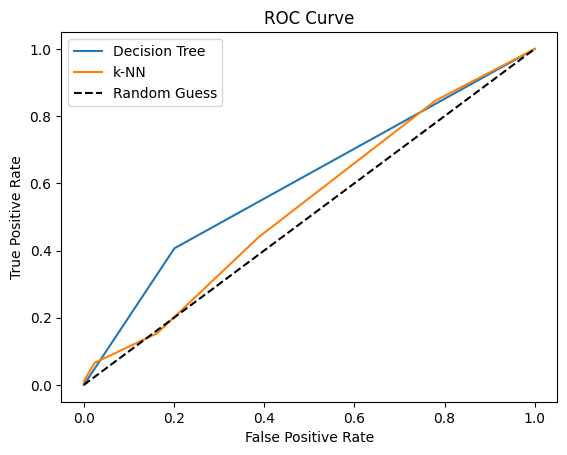

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Encode categorical features into numerical values
le = LabelEncoder()
data_encoded = data.apply(le.fit_transform)

# Separate features (X) and target (y)
X = data_encoded.drop('Class', axis=1)
y = data_encoded['Class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Train a k-NN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict with Decision Tree
y_pred_dt = dt_model.predict(X_test)

# Predict with k-NN
y_pred_knn = knn_model.predict(X_test)

# Evaluate the models using various metrics
dt_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt, average='macro'),
    'Recall': recall_score(y_test, y_pred_dt, average='macro'),
    'F1 Score': f1_score(y_test, y_pred_dt, average='macro'),
}

knn_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_knn),
    'Precision': precision_score(y_test, y_pred_knn, average='macro'),
    'Recall': recall_score(y_test, y_pred_knn, average='macro'),
    'F1 Score': f1_score(y_test, y_pred_knn, average='macro'),
}

# Display the evaluation results
evaluation_df = pd.DataFrame([dt_metrics, knn_metrics], index=["Decision Tree", "k-NN"])
print("Evaluation Metrics for Decision Tree and k-NN:")
display(evaluation_df)

# Calculate ROC curve for both models
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt, pos_label=1)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn, pos_label=1)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_dt, tpr_dt, label="Decision Tree")
plt.plot(fpr_knn, tpr_knn, label="k-NN")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="best")
plt.show()
